# <font color = 'yellow'>Churn Modeling with ANN</font>
<!-- # <span style="color:Red; background-color:yellow;">Churn Modeling (ANN)</span> -->

In [16]:
# Install the required libraries for the project:
# - tensorflow: for building and training the artificial neural network (ANN)
# - Keras: A high-level API built on top of TensorFlow for building and training neural networks.
# - numpy: for numerical computations
# - pandas: for data manipulation and analysis
# - scikit-learn: for preprocessing and evaluation
# - matplotlib: for data visualization
# - tensorboard: for visualizing the training process
# - streamlit: for creating an interactive web application
%pip install keras tensorflow numpy pandas scikit-learn matplotlib tensorboard streamlit
# run above line if you are not yet installed the libiraries


  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached namex-0.0.9-py3-none-any.whl.metadata (322 bytes)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached keras-3.9.2-py3-none-any.whl (1.3 MB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
    --------------------------------------- 5.2

## <font color = 'yellow'>Import Libiraries</font>

In [2]:
# For data manipulation and analysis
import pandas as pd
# For numerical computations
import numpy as np
# For splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
# for saving and loading the model
import pickle

## <font color='Yellow'>Load Dataset</font>

In [3]:
data = pd.read_csv('./Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
4233,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
4234,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
4235,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## <font color='Yellow'>Data Pre-Processing</font>

### Drop Irrelavent Columns

In [5]:
data = data.drop(columns=['RowNumber','CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encode Categorical Values

#### Label Encoding -> Column = Gender

* **`0`** - Female
* **`1`** - Male

In [6]:
# importing libiraies from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# Initialize label encode
encode_label_gender = LabelEncoder()

# apply encoding into column 'Gender'
data['Gender'] = encode_label_gender.fit_transform(data['Gender'])
data


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
4232,771,France,1,39,5,0.00,2,1,0,96270.64,0
4233,516,France,1,35,10,57369.61,1,1,1,101699.77,0
4234,709,France,0,36,7,0.00,1,0,1,42085.58,1
4235,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


#### OneHot-Encoder -> Column Geography
* *` 1 0 0 `* - France
* *` 0 1 0 `* - Germany
* *` 0 0 1 `* - Spain

In [7]:
# importing libiraries from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder

# initialise encoder
oneHot_encode_geography = OneHotEncoder(sparse_output=False)

# applay oneHot Encoder
oneHot_encode = oneHot_encode_geography.fit_transform(data[['Geography']])
oneHot_encode

# get encoded columns name
encoded_geography_labels = oneHot_encode_geography.get_feature_names_out(['Geography'])
encoded_geography_labels

# convert into dataframe
encoded_geography = pd.DataFrame(oneHot_encode,columns= oneHot_encode_geography.get_feature_names_out(['Geography']))
encoded_geography

# drop colummn of Geography in data table
data = data.drop(columns=['Geography'], axis=1)
data

# mearge oneHot encoded label into Data table
data = pd.concat([data, encoded_geography], axis=1)
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4232,771,1,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0
4233,516,1,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0
4234,709,0,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0
4235,772,1,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0


#### Save Encoders

In [8]:
# import pickle to save models
import pickle

# save gender label encoder
with open('encode_label_gender.pkl', 'wb') as file:
    pickle.dump(encode_label_gender, file)

# save geography oneHot encoder label
with open('oneHot_encode_geography.pkl', 'wb') as file:
    pickle.dump(oneHot_encode_geography, file)

### Separate data set as input and result

In [9]:
x = data.drop(columns=['Exited'])
y = data['Exited']

## <font color = 'yellow'> Seperate Test and Train dataset </font>

In [10]:
# import libiraries from skearn > modelSelection to spliting test and training dataset
from sklearn.model_selection import train_test_split

# Spliting into models as 80% of Training and 20% of Test
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

# display length of values
print("size of X training models : ", len(x_train))
print("size of X test models : ", len(x_test))
print("size of Y training models : ", len(y_train))
print("size of Y test models : ", len(y_test))

# Check the number of dimensions
x_train_dim = x_train.ndim
print("Number of dimensions for x_train:", x_train_dim)

x_test_dim = x_train.ndim
print("Number of dimensions for x_test:", x_test_dim)

size of X training models :  3389
size of X test models :  848
size of Y training models :  3389
size of Y test models :  848
Number of dimensions for x_train: 2
Number of dimensions for x_test: 2


## <font color = 'yellow'>Feature Scaling </font>

### Standard Scaler

In [11]:
# import libiraries from sklearn > preprocessing
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform training data
x_train = scaler.fit_transform(x_train)

# Transform test data (without fitting again)
x_test = scaler.transform(x_test)

# didplay values
print("After Scaling x_train : ", x_train[0])
print("After Scaling x_test : ", x_test[0])

After Scaling x_train :  [ 0.0107911  -1.04374126 -0.84550407 -0.33384972 -0.00869461 -0.78480637
  0.63873056  1.06495586  0.32687737 -0.93401054 -0.64881766  1.79017168]
After Scaling x_test :  [-0.5690557   0.95809186 -0.84550407  1.7176765   1.27427897 -0.78480637
  0.63873056 -0.93900605  1.17646278 -0.93401054 -0.64881766  1.79017168]


### Save Scaler

In [12]:
import pickle

# save scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler,file)

### Rough work

In [13]:
print("x_train Dimentions", x_train.ndim)
print("x_test Dimentions", x_test.ndim)

# print("x_train_flatened", x_train_flatened.ndim)
# print("x_test_flatened", x_test_flatened.ndim)

print("y_train", y_train.ndim)
print("y_train", type(y_train))


print("y_test", y_test.ndim)
print("y_test", type(y_test))

x_train Dimentions 2
x_test Dimentions 2
y_train 1
y_train <class 'pandas.core.series.Series'>
y_test 1
y_test <class 'pandas.core.series.Series'>


In [14]:
x.shape

(4237, 12)

## <font color = 'yellow'>Build ANN Model - Artificial Neural Network </font>

### Import Libiraries

In [17]:
import tensorflow
import keras

In [18]:
# Checking the tensorflow libraries
print(tensorflow.__version__)

# checking the keras libraries
print(keras.__version__)


2.19.0
3.9.2


### Build Neural Network Model using Tensorflow and Keras

In [ ]:
x_train.shape

(3389, 12)

In [ ]:
# step 01: create sequential model
model = keras.Sequential([
    # step 02: Input Layer
    keras.layers.Dense(
        x_train.shape[1], #input shape
        input_dim = x_train.shape[1], # input layers
        activation = 'relu' #Activation type
    ),

    # # step 03: Hidden Layer
    # keras.layers.Dense(512, activation='relu'),
    # keras.layers.Dense(256, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dense(16, activation='relu'),
    # keras.layers.Dense(8, activation='relu'),
    # keras.layers.Dense(4, activation='relu'),
    # keras.layers.Dense(2, activation='relu'),

    # Step 04: Output Layer
    keras.layers.Dense(
        1, # Output layers for last hidden layer o/p (Note: for last layer no need for input layer size)
        activation= 'sigmoid'
    )
])

# Summary
model.summary()

c:\Users\Mohan Govindasamy\Documents\AI & ML Course Training\GitHub_Learnings\Generative_AI_Learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053 (4.11 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

### Compaile Model / Neural Network

In [ ]:
# compile model with
# 1. optimiser = adam
# 2. Loss = binary_crossentropy
# 3. Metrics = accuracy

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053 (4.11 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

### Setup tensorboard

In [ ]:
from keras.callbacks import TensorBoard
import datetime

# creating logs directory
log_fs = "logs/fit/"+ datetime.datetime.now().strftime("%y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_fs, histogram_freq=1)

### Setup early stoping
to prevent overfitting by stopping training once the model's performance on a validation set starts to decline. It helps ensure that the model generalizes well to unseen data rather than memorizing the training data.


In [ ]:
from keras.callbacks import EarlyStopping

# define early stoping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


## Fit into Model with our data

In [ ]:
# Train model test and tran data along with tensorboard and early stopping callbacks
history = model.fit(
    x_train, 
    y_train, 
    validation_data=(x_test,y_test),
    batch_size=32,
    epochs=100, 
    callbacks=[tensorflow_callback, early_stopping],
    verbose=1
)

# summary
model.summary()

# Print available keys in history
print(history.history.keys())

# Access accuracy and loss
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])


Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5801 - loss: 0.8494 - val_accuracy: 0.6108 - val_loss: 0.7577
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6881 - loss: 0.6994 - val_accuracy: 0.6639 - val_loss: 0.6826
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7181 - loss: 0.6232 - val_accuracy: 0.6792 - val_loss: 0.6456
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7354 - loss: 0.5830 - val_accuracy: 0.7040 - val_loss: 0.6136
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7536 - loss: 0.5503 - val_accuracy: 0.7075 - val_loss: 0.5966
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7514 - loss: 0.5400 - val_accuracy: 0.7394 - val_loss: 0.5797
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7656 - loss: 0.5243 - val_accuracy: 0.7441 - val_loss: 0.5715
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7698 - loss: 0.5099 - val_accu

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,161 (12.35 KB)

 Trainable params: 1,053 (4.11 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,108 (8.24 KB)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Training Accuracy: [0.6190616488456726, 0.6919445395469666, 0.7297137975692749, 0.7385659217834473, 0.749778687953949, 0.7544998526573181, 0.7633520364761353, 0.7689583897590637, 0.7683682441711426, 0.774269700050354, 0.7722041606903076, 0.7789908647537231, 0.7786957621574402, 0.7733844518661499, 0.7760401368141174, 0.7795810103416443, 0.7798760533332825, 0.7751548886299133, 0.7786957621574402, 0.7792859077453613, 0.7840070724487305, 0.7795810103416443, 0.7804661989212036, 0.782236635684967, 0.7831218838691711, 0.7840070724487305, 0.7834169268608093, 0.7887282371520996, 0.7845972180366516, 0.78253173828125, 0.7857775092124939, 0.7845972180366516, 0.7837120294570923, 0.7857775092124939, 0.7813514471054077, 0.7890233397483826, 0.7869578003883362, 0.7890233397483826, 0.7887282371520996]
Validation Accuracy: [0.6108490824699402, 0.6639150977134705, 0.6792452931404114, 0.7040094137191772, 0.7075471878051758, 0.739386796951294, 0.74

### Save the trained model

model.h5, .h5 format is commonly used for saving neural network models in Keras/TensorFlow. This allows you to reuse the model later without needing to retrain it.

In [ ]:
# Once the training is complete, this line saves the trained model to a file named
model.save('my_model_h5.h5')  # Legacy format
model.save('my_model_keras.keras')  # Recommended format


## <font color = 'yellow'> TensorBoard </font>

### Load Tensorboard Extension

In [ ]:
# load extention for tensorboard

# %load_ext tensorboard

In [ ]:
# %reload_ext tensorboard

In [ ]:
# %tensorboard --logdir logs/fit/250503-175444

## Predict Model result

In [ ]:
# predict test samples with our model
y_pred = model.predict(x_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Convert all elements to integers
y_pred = y_pred.astype(int)

In [ ]:
print( 'shape of y_pred', y_pred.shape)
print( 'shape of y_test', y_test.shape)

shape of y_pred (848, 1)
shape of y_test (848,)


In [ ]:
data.shape

(4237, 13)

In [ ]:
y_test = y_test.reset_index(drop=True)

print(y_test[1])

1


In [ ]:
# change I values as wish it will be possition of array alone not actual values
i = 0,

# this will print 10 values in 1D array, because we give output dense layer as 10
print(f"Displaying y_pred[{i}] in console 1D array of 10 values (Dense o/p layes = 1)")
print(y_pred[i])

# in 1D array / y_pred[i], maximum values (consider predected -> o/p will be high)
print(f"\nIn the above o/p, Maximum values for y_pred[{i}] is:")
np.argmax(y_pred[i])
print()
y_test = y_test.reset_index(drop=True)
# print(y_test[i])
print(y_test.iloc[i])


Displaying y_pred[(0,)] in console 1D array of 10 values (Dense o/p layes = 1)
[0]

In the above o/p, Maximum values for y_pred[(0,)] is:

0


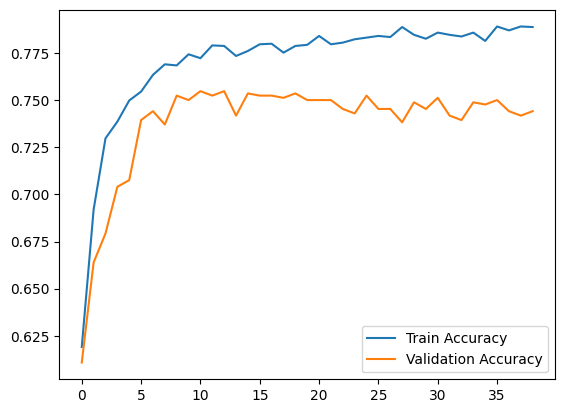

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()



In [ ]:
count = 0
for pre in y_pred:
    if(pre==1):
        # print(pre)
        count = count+1
print(count)

0


In [ ]:
# print(y_test.head(20))
# Print y_pred and y_test in the required format
for pred, actual in zip(y_pred, y_test):
    print(pred, actual)


[0] 0
[0] 1
[0] 0
[0] 1
[0] 0
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 0
[0] 1
[0] 1
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 0
[0] 0
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 0
[0] 0
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 0
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 0
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 0
[0] 0
[0] 1
[0] 1
[0] 1
[0] 1
[0] 0
[0] 1
[0] 0
[0] 1
[0] 

In [ ]:
import numpy as np 
import pandas as pd 
import tensorflow 
import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle 
import streamlit

# Step 02: Load the Trained Model
model = tensorflow.keras.models.load_model('./my_model_keras.keras')

#Step 03: Load Encoders and Scaler
# Load encoded labels for Gender
with open('encode_label_gender.pkl', 'rb') as file:
    encode_label_gender = pickle.load(file)

# Load OneHot Encoded - Geography
with open('oneHot_encode_geography.pkl', 'rb') as file:
    oneHot_encode_geography = pickle.load(file)

# Load standard Scaller
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

#  Step 05: Gather User Input by creating (Streamlit provides interactive elements for user input:)
# creating user inputs in streamlit apps
Credit_Score = 619
Geography = 'France'
Gender = 'Female'
Age = 42
Tenure = 2
Balance = 0
Num_Of_Products = 2
Has_Credit_Card = 1
Is_Active_Member = 1
Estimated_Salary = 101348.88
Exited = 1

# - streamlit.selectbox(): Dropdown selection.
# - streamlit.slider(): Slider for numerical selection.
# - streamlit.number_input(): Input box for entering numbers.


# Step 06: Prepare input data for Model
input_data = pd.DataFrame({
    'CreditScore': [Credit_Score], 
    # 'Geography' : [oneHot_encode_geography.transform[columns=]],  # will be process after this need to do one-hot encode
    'Gender': [encode_label_gender.transform([Gender]) [0]], #transform into label encoder
    'Age' : [Age], 
    'Tenure' : [Tenure], 
    'Balance' : [Balance] ,
    'NumOfProducts' : [Num_Of_Products] , 
    'HasCrCard' : [Has_Credit_Card],
    'IsActiveMember' : [Is_Active_Member], 
    'EstimatedSalary' : [Estimated_Salary]
})


# Step 07: Apply One-Hot Encoding to Geography
# - Transforms Geography into One-Hot Encoding format.
geography_encoder = oneHot_encode_geography.transform([[Geography]])
# - Creates a new DataFrame for encoded Geography.
geography_encoder_dataFrame = pd.DataFrame( geography_encoder ,columns= oneHot_encode_geography.get_feature_names_out(['Geography']))

# Step 08: Combine Encoded Data
# Add this one-hot endoer 'Geography' into input data
# - Resets index to avoid merging issues.
input_data = pd.concat([input_data.reset_index(drop=True), geography_encoder_dataFrame], axis=1)


# Step 09: Standard scaler for input data (Feature Scaling)
# input data contains a mix of integer and string column names, but scikit-learn expects all feature names to be strings.
# Convert Column Names to Strings
input_data.columns = input_data.columns.astype(str)

# Applies standardization to all numerical values for model compatibility.
scaler_data = scaler.transform(input_data)

# Step 10: Make Predictions
predection = model.predict(input_data)
predection_score = predection[0][0] # array([[0.72]]) => 0.72 will be output


# Step 11: Display Results in Streamlit
print(f'Churn Probability : {predection_score:.2f}') # Shows the churn probability rounded to 2 decimal places.

if predection_score > 0.5:
    print("Customer is Likely to be Churn.") # If churn probability > 0.5, the customer is likely to churn.
else:
    print("Customer is Not Likely to be Churn.") #Otherwise, they are not likely to churn.

print('Entered - Exited values is ', Exited )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Churn Probability : 1.00
Customer is Likely to be Churn.
Entered - Exited values is  1


c:\Users\Mohan Govindasamy\Documents\AI & ML Course Training\GitHub_Learnings\Generative_AI_Learning\venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
c:\Users\Mohan Govindasamy\Documents\AI & ML Course Training\GitHub_Learnings\Generative_AI_Learning\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
